### Importation lib

In [1]:
import pandas as pd
from math import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser
import re
import contextualbandits
import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from scipy import stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
import statsmodels.api as sm

pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

%matplotlib inline
sns.set_palette("hls")

# Traitement données

Importation des données et nettoyage :

In [2]:
path = '/home/agary/Documents/Data/survey_graoully/'
filename = 'raw_data.csv'

df = pd.read_csv(path + filename)

In [3]:
df.head()

Unnamed: 0 name    duration  duration.1  duration.2  duration.3  duration.4  \
0       fmax  NaN  1200000.00  1300000.00  1400000.00  1500000.00  1600000.00   
1          0   ep       60.34       54.68       50.85       47.24       44.49   
2          1   bt      454.96      433.29      407.79      385.32      370.32   
3          2   cg      123.37      119.64      115.49      112.74      110.26   
4          3   ep       58.97       55.64       50.91       48.26       44.56   

   duration.5  duration.6  duration.7  duration.8  duration.9  duration.10  \
0  1700000.00  1800000.00  1900000.00  2000000.00  2100000.00   2200000.00   
1       41.83       39.51       37.44       35.35       33.85        31.95   
2      350.65      339.44      324.62      312.58      302.31       292.49   
3      108.08      106.54      105.11      103.69      102.30       102.04   
4       41.87       39.28       37.21       35.38       33.79        32.86   

   duration.11  duration.12    ref_energy  ref_energy.1  ref_energy.2  \
0   2300000.00   2400000.00  1.200000e+06  1.300000e+06  1.400000e+06   
1        30.75        29.50  8.552923e+03  7.855957e+03  7.460745e+03   
2       284.48       273.88  7.631108e+04  7.411503e+04  7.094306e+04   
3       100.51        99.65  2.332938e+04  2.299090e+04  2.265537e+04   
4        30.76        29.57  8.408597e+03  8.023265e+03  7.394429e+03   

   ref_energy.3  ref_energy.4  ref_energy.5  ref_energy.6  ref_energy.7  \
0  1.500000e+06  1.600000e+06  1.700000e+06  1.800000e+06  1.900000e+06   
1  7.038092e+03  6.727978e+03  6.517539e+03  6.303277e+03  6.071815e+03   
2  6.861678e+04  6.691220e+04  6.589895e+04  6.501161e+04  6.363045e+04   
3  2.242713e+04  2.204699e+04  2.220675e+04  2.251838e+04  2.261912e+04   
4  7.156221e+03  6.742408e+03  6.575162e+03  6.297746e+03  6.063463e+03   

   ref_energy.8  ref_energy.9  ref_energy.10  ref_energy.11  ref_energy.12  
0  2.000000e+06  2.100000e+06   2.200000e+06   2.300000e+06   2.400000e+06  
1  5.827464e+03  5.685824e+03   5.515283e+03   5.362846e+03   5.354881e+03  
2  6.241168e+04  6.170368e+04   6.095742e+04   6.068923e+04   6.022492e+04  
3  2.244388e+04  2.250565e+04   2.277765e+04   2.270879e+04   2.291729e+04  
4  5.864656e+03  5.717994e+03   5.604993e+03   5.430115e+03   5.326742e+03

In [4]:
data = df.drop(labels=0,axis=0)
data = data.drop(columns=['Unnamed: 0'])

data.head()

name  duration  duration.1  duration.2  duration.3  duration.4  duration.5  \
1   ep     60.34       54.68       50.85       47.24       44.49       41.83   
2   bt    454.96      433.29      407.79      385.32      370.32      350.65   
3   cg    123.37      119.64      115.49      112.74      110.26      108.08   
4   ep     58.97       55.64       50.91       48.26       44.56       41.87   
5   is    150.96      151.21      149.85      150.17      142.46      139.58   

   duration.6  duration.7  duration.8  duration.9  duration.10  duration.11  \
1       39.51       37.44       35.35       33.85        31.95        30.75   
2      339.44      324.62      312.58      302.31       292.49       284.48   
3      106.54      105.11      103.69      102.30       102.04       100.51   
4       39.28       37.21       35.38       33.79        32.86        30.76   
5      139.81      137.48      133.40      139.71       131.52       143.37   

   duration.12    ref_energy  ref_energy.1  ref_energy.2  ref_energy.3  \
1        29.50   8552.922926   7855.956942   7460.745423   7038.091509   
2       273.88  76311.077943  74115.031814  70943.060980  68616.781606   
3        99.65  23329.376825  22990.899920  22655.366420  22427.130286   
4        29.57   8408.596761   8023.265103   7394.429024   7156.220694   
5       132.62  24349.848000  24761.195834  24933.085435  25291.600185   

   ref_energy.4  ref_energy.5  ref_energy.6  ref_energy.7  ref_energy.8  \
1   6727.977551   6517.539011   6303.276522   6071.815385   5827.464019   
2  66912.202870  65898.949694  65011.606773  63630.448058  62411.681133   
3  22046.993600  22206.752836  22518.379822  22619.124428  22443.879276   
4   6742.408221   6575.161528   6297.745803   6063.463353   5864.656190   
5  24233.482556  24662.342069  25215.536138  25170.995244  24803.762089   

   ref_energy.9  ref_energy.10  ref_energy.11  ref_energy.12  
1   5685.823558    5515.282554    5362.845725    5354.881323  
2  61703.684251   60957.415915   60689.233762   60224.920113  
3  22505.646835   22777.648167   22708.790942   22917.293298  
4   5717.993691    5604.992843    5430.114789    5326.742101  
5  26467.398260   25495.076661   28161.312413   26598.675707

Création du dataframe de récompenses : rewards

In [5]:
rewards = data[data.columns[14:27]]

rewards.head()

ref_energy  ref_energy.1  ref_energy.2  ref_energy.3  ref_energy.4  \
1   8552.922926   7855.956942   7460.745423   7038.091509   6727.977551   
2  76311.077943  74115.031814  70943.060980  68616.781606  66912.202870   
3  23329.376825  22990.899920  22655.366420  22427.130286  22046.993600   
4   8408.596761   8023.265103   7394.429024   7156.220694   6742.408221   
5  24349.848000  24761.195834  24933.085435  25291.600185  24233.482556   

   ref_energy.5  ref_energy.6  ref_energy.7  ref_energy.8  ref_energy.9  \
1   6517.539011   6303.276522   6071.815385   5827.464019   5685.823558   
2  65898.949694  65011.606773  63630.448058  62411.681133  61703.684251   
3  22206.752836  22518.379822  22619.124428  22443.879276  22505.646835   
4   6575.161528   6297.745803   6063.463353   5864.656190   5717.993691   
5  24662.342069  25215.536138  25170.995244  24803.762089  26467.398260   

   ref_energy.10  ref_energy.11  ref_energy.12  
1    5515.282554    5362.845725    5354.881323  
2   60957.415915   60689.233762   60224.920113  
3   22777.648167   22708.790942   22917.293298  
4    5604.992843    5430.114789    5326.742101  
5   25495.076661   28161.312413   26598.675707

Multiplication par -1 :

Les algorithmes de bandits maximisent les récompenses, or ici l'objectif est de minimiser la onsommation énergétique.

In [6]:
rewards *= (-1)

# Fonctions

#### PlayArm :

The variable arm represents the selected arm visitor_reward is a dataframe of rewards iter is the current iteration S is the matrix of results for each arm (tests and empirical mean) In the matrix S :

Retrieves the reward associated with the iter instant in the reward dataframe

- Updates the average reward of the chosen arm with the reward obtained

- Adds a test to the selected arm (arm)

- Returns the updated S matrix



Arguments :

- iter : Integer value

- arm : Integer value

- S : Array

- visitor_reward : Array



Value :

- S : Array

In [7]:
def PlayArm(iter,arm,S,visitor_reward):
    #mean
    arm = int(arm)
    iter = int(iter)
    S[0,arm] = (S[0,arm]*S[1,arm] + visitor_reward[iter,arm]) / (S[1,arm]+1)
    #play
    S[1,arm] += 1
    return S

#### ConditionForEpsilonGreedy :

Choose the best with 1 - espsilon probability. 1 : best arm , 2 : other arm



Arguments :


- S	: Numeric matrix

- epsilon : Numeric value (optional)

- K : Integer value (optional)



Value :

- Integer value

In [8]:
def ConditionForEpsilonGreedy(S, epsilon=0.25,K=None):
    if K == None :
        K = np.shape(S)[1]
        
    # choose the best with 1-epsilon proba. 0 : best arm, 1  : other arm
    u = np.random.binomial(1,1-epsilon)
    
    # the best one have been choose
    if u == 1 :
        return int(np.argmax(S[0,:]))
    
    # randomly select another arm :
    else :
        m = np.argmax(S[0,:])
        l = np.arange(0,K,1)
        l = np.delete(l,m)
        return np.random.choice(l)

#### ControlDataMissing :

Control data for bandit. Check in a dataframe if there is some missing values Print a message if it's not respected. Else return TRUE.



Arguments :

- visitor_reward : Dataframe of integers or numeric values



Value :

- Logical value

In [9]:
def ControlDataMissing(visitor_reward):
    t = pd.DataFrame.isnull(visitor_reward)
    c = sum(pd.DataFrame.sum(t))
    
    if c > 0 :
        raise ValueError('Missing data in arm results database')

#### DataControlK :

Control arm and data for bandit Check if a dataframe gets an equal number of colonms than K possible arms. Check if K geq 2. Print a message and stop if this two conditions are not respected. Else return TRUE.



Arguments :

- visitor_reward : Dataframe of integer or numeric values

- K : Integer value (optional)



Value :

- Logical value

In [10]:
def DataControlK(visitor_reward, K = None):
    if K == None :
        K = np.shape(visitor_reward)[1]
    
    if K < 2 :
        raise ValueError('Arm must be superior or equal to 2')
    
    if np.shape(visitor_reward)[1] != K :
        raise ValueError('Each arm need a result')

#### BanditRewardControl :

Control data for bandit algorithm. See also ControlDataMissing and DataControlK



Arguments :

- visitor_reward : Dataframe of integer or numeric values

- K : Integer value (optional)



Value :

- Logical value

In [11]:
def BanditRewardControl(visitor_reward, K=None):
    DataControlK(visitor_reward,K)
    ControlDataMissing(visitor_reward)

#### EpsilonGreedy :

Control data in visitor_reward with BanditRewardControl Stop if something is wrong. Generate a matrix to save the results (S). At each iteration play the best arm with a probability of 1-epsilon and other arm with probability epsilon Returns the calculation time. Return the estimated and actual averages and number of choices for each arm. See also ConditionForEpsilonGreedy, GenerateMatrixS, and PlayArm.



Arguments :

- visitor_reward : Dataframe of integer or numeric values

- K	: Integer value (optional)

- epsilon : Numeric value (optional)



Values :

List of element:

- S : numerical matrix of results ,

- choice : choices of EpsilonGreedy,

- time : time of cumputation,

- theta_hat : mean estimated of each arm

- theta : real mean of each arm

In [12]:
def EpsilonGreedy(visitor_reward0, K = None, epsilon = 0.25):
    if K == None :
        K = np.shape(visitor_reward0)[1]
    # Control :
    BanditRewardControl(visitor_reward = visitor_reward0, K = K)
    
    # data formating :
    visitor_reward = np.array(visitor_reward0)
    
    # keep list of choice :
    choice = np.zeros(np.shape(visitor_reward)[0])
    S = np.zeros((2,K))
    tic = time.time()
    
    if K >= np.shape(visitor_reward)[0] :
        print(" Warning : More arm than visitors !")
        
        for j in range(np.shape(visitor_reward)[0]):
            S = PlayArm(j,j,S,visitor_reward)
        
        choice[0:np.shape(visitor_reward)[0]] = np.arange(0,np.shape(visitor_reward)[0]+1,1)
        
        if K > np.shape(visitor_reward)[0] :
            S[:,j:K] = 0
        
        return [S, choice]
    
    else :
        
        # Initialisation
        for j in range(K):
            S = PlayArm(j, j, S, visitor_reward)
            choice[1:K] = np.arange(1,K,1)

        for i in range(K,np.shape(visitor_reward)[0]):
            choice[i] = ConditionForEpsilonGreedy(S, epsilon)
            S = PlayArm(i,choice[i],S,visitor_reward)

            
        toc = time.time()
        
        # coef estimate :
        theta_hat = S[0,:]
        
        # real coef :
        theta = pd.DataFrame.mean(visitor_reward0)
        
        return [S, choice, toc-tic, theta_hat, theta]

#### Regret :

See "cumulative_regret.ipynb"

In [13]:
def SimpleRegret(choice,visitor_reward):
    visitor_reward
    n = visitor_reward.shape[0]
    regret = np.zeros(n)
    for i in range(n):
        regret[i] = RegretValue(choice[i],np.array(visitor_reward)[i,:])
    return regret

def RegretValue(arm, vec_visitor_reward):
    return max(vec_visitor_reward) - vec_visitor_reward[int(arm)]

def cumulativeRegret(choice,visitor_reward):
    regret = SimpleRegret(choice,visitor_reward)
    return np.cumsum(regret)

# Tests

#### Tests sur données générées :

Génération d'un problème de bandits avec 5 bras différents : V1,V2,V3,V4,V5; puis test de l'algo Epsilon-greedy sur celui-ci (avec tracé du regret).

In [14]:
V1 = np.random.binomial(1,0.6,5000)
V2 = np.random.binomial(1,0.7,5000)
V3 = np.random.binomial(1,0.5,5000)
V4 = np.random.binomial(1,0.3,5000)
V5 = np.random.binomial(1,0.9,5000)

a = np.transpose(np.array([V1,V2,V3,V4,V5]))

rewards0 = pd.DataFrame(a, columns = ['Bandit 1', 'Bandit 2', 'Bandit 3', 'Bandit 4', 'Bandit 5'])

Exécution de l'algorithme avec différentes valeurs de $\epsilon$ :

In [15]:
epsilon_greedy_alloc0 = EpsilonGreedy(rewards0, epsilon = 0.05)
epsilon_greedy_alloc1 = EpsilonGreedy(rewards0, epsilon = 0.1)
epsilon_greedy_alloc2 = EpsilonGreedy(rewards0, epsilon = 0.15)
epsilon_greedy_alloc3 = EpsilonGreedy(rewards0, epsilon = 0.2)
epsilon_greedy_alloc4 = EpsilonGreedy(rewards0, epsilon = 0.25)

In [16]:
print("Nombre de choix de chaque bras :")
print(epsilon_greedy_alloc0[0][1])

Nombre de choix de chaque bras :
[  53.   76.   59.   68. 4744.]


In [17]:
print('Récompenses moyennes estimées :')
print(epsilon_greedy_alloc0[3])

Récompenses moyennes estimées :
[0.62264151 0.80263158 0.57627119 0.25       0.89565767]


Tracé du regret cumulé pour chaque valeur de $\epsilon$ testée :

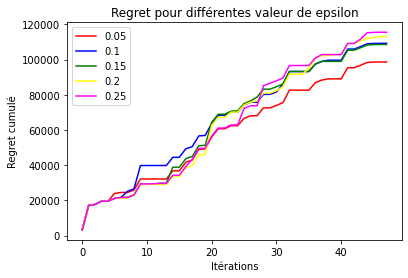

In [18]:
cum_reg0 = cumulativeRegret(epsilon_greedy_alloc0[1],rewards)
cum_reg1 = cumulativeRegret(epsilon_greedy_alloc1[1],rewards)
cum_reg2 = cumulativeRegret(epsilon_greedy_alloc2[1],rewards)
cum_reg3 = cumulativeRegret(epsilon_greedy_alloc3[1],rewards)
cum_reg4 = cumulativeRegret(epsilon_greedy_alloc4[1],rewards)

plt.plot(cum_reg0,color='red',label='0.05');
plt.plot(cum_reg1,color='blue',label='0.1');
plt.plot(cum_reg2,color='green',label='0.15');
plt.plot(cum_reg3,color='yellow',label='0.2');
plt.plot(cum_reg4,color='magenta',label='0.25');
plt.xlabel('Itérations');
plt.ylabel('Regret cumulé');
plt.title('Regret pour différentes valeur de epsilon')
plt.legend();
plt.show();

#### Tests sur dataset

Test de l'algorithme sur les données importées en haut de page :

In [54]:
epsilon_greedy_alloc = EpsilonGreedy(rewards,epsilon = 0.1)

In [55]:
print(epsilon_greedy_alloc[1])

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.  8.  3.  0.  0.  5.
  5.  3.  2.  4.  3.  3.  3.  3.  0.  0.  4.  8. 10.  8. 10.  4. 12. 12.
  3.  3.  1.  3.  3.  3. 11.  2. 11. 11. 11.  3.]


In [56]:
print(epsilon_greedy_alloc[3])

[-33115.02646395 -48538.36314485 -33670.73989326 -28891.29523718
 -31316.42829457 -37075.42922816 -29504.16591876 -63740.33490995
 -38457.36413246 -61725.89085184 -30634.18897144 -34581.86957797
 -37839.14791832]


In [57]:
print(epsilon_greedy_alloc[4])

ref_energy      -37032.079094
ref_energy.1    -35987.832609
ref_energy.2    -35105.879111
ref_energy.3    -34525.041593
ref_energy.4    -33694.291354
ref_energy.5    -33783.476903
ref_energy.6    -33651.921656
ref_energy.7    -33335.963997
ref_energy.8    -33044.588899
ref_energy.9    -33003.540151
ref_energy.10   -32858.778212
ref_energy.11   -33170.364731
ref_energy.12   -32977.843983
dtype: float64


Tracé du regret au cours des itérations :

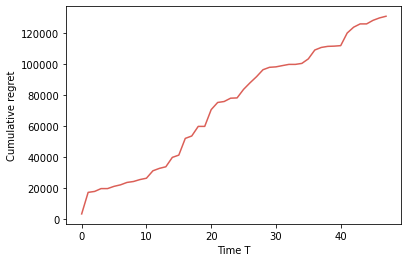

In [58]:
cum_reg = cumulativeRegret(epsilon_greedy_alloc[1],rewards)